In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('CLEAN.csv')
df.drop(columns=['Link', 'Note'], inplace=True)

accepted = df[df['Acceptances'].str.contains('MIT')]
accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
accepted['Decision'] = 'Accepted'

rejected = df[df['Rejections'].str.contains('MIT')]
rejected.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
rejected['Decision'] = 'Rejected'

rejected = rejected.sample(n=len(accepted), random_state=42)

C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\2719764494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\2719764494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['Decision'] = 'Accepted'
C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\2719764494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [37]:
accepted

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,F,WHITE,NY,Low,PUBLIC,NONE,CS,-1,1550,-1,8.5,8.0,Accepted
9,F,BLACK,TX,Middle,PUBLIC,URM,ENG,3,1520,35,3.0,2.5,Accepted
11,T,ASIAN,CA,Low,PUBLIC,NONE,CS,2,1560,-1,6.5,7.2,Accepted
20,M,WHITE,CA,Low,PUBLIC,NONE,BIO,3,1540,35,7.5,7.3,Accepted
25,F,WHITE,CA,Low,PUBLIC,NONE,CS,1,1490,35,7.5,4.5,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,M,WHITE,OR,High,PRIVATE,NONE,POLISCI,-1,1490,-1,6.5,6.5,Accepted
2167,F,ASIAN,-1,-1,PUBLIC,NONE,BUSINESS,-1,-1,-1,7.5,6.5,Accepted
2183,NB,ASIAN,CA,Low,PUBLIC,NONE,BIO,1,1550,36,7.5,2.5,Accepted
2215,M,HISPANIC,CA,Low,MAGNET,URM,CS,-1,1520,-1,6.5,3.5,Accepted


In [38]:
rejected

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
1366,M,ASIAN,CA,High,PUBLIC,NONE,CS,2,1590,-1,6.5,2.5,Rejected
1656,M,ASIAN,NY,Low,PUBLIC,NONE,CS,-1,1500,35,6.5,2.5,Rejected
833,F,ASIAN,TX,Low,PUBLIC,LGBT,CS,-1,1560,-1,6.5,3.7,Rejected
1861,M,ASIAN,CA,Low,-1,NONE,CS,-1,-1,35,8.5,6.5,Rejected
525,M,WHITE,CO,Low,-1,NONE,CHEMISTRY,-1,1560,15,7.5,2.5,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,M,ASIAN,CA,-1,PRIVATE,NONE,CS,-1,-1,35,7.5,4.7,Rejected
1327,M,ASIAN,MA,High,PUBLIC,NONE,CS,-1,-1,35,7.5,8.3,Rejected
1370,F,WHITE,CA,High,SMALL,NONE,CS,1,1510,-1,7.5,2.5,Rejected
1376,M,ASIAN,MI,Low,PUBLIC,NONE,MATH,-1,1570,-1,8.5,7.8,Rejected


In [39]:
dataset = pd.concat([accepted, rejected])
dataset

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,F,WHITE,NY,Low,PUBLIC,NONE,CS,-1,1550,-1,8.5,8.0,Accepted
9,F,BLACK,TX,Middle,PUBLIC,URM,ENG,3,1520,35,3.0,2.5,Accepted
11,T,ASIAN,CA,Low,PUBLIC,NONE,CS,2,1560,-1,6.5,7.2,Accepted
20,M,WHITE,CA,Low,PUBLIC,NONE,BIO,3,1540,35,7.5,7.3,Accepted
25,F,WHITE,CA,Low,PUBLIC,NONE,CS,1,1490,35,7.5,4.5,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,M,ASIAN,CA,-1,PRIVATE,NONE,CS,-1,-1,35,7.5,4.7,Rejected
1327,M,ASIAN,MA,High,PUBLIC,NONE,CS,-1,-1,35,7.5,8.3,Rejected
1370,F,WHITE,CA,High,SMALL,NONE,CS,1,1510,-1,7.5,2.5,Rejected
1376,M,ASIAN,MI,Low,PUBLIC,NONE,MATH,-1,1570,-1,8.5,7.8,Rejected


In [40]:
# encode data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Race'] = le.fit_transform(dataset['Race'])
dataset['Residence'] = le.fit_transform(dataset['Residence'])
dataset['Income'] = le.fit_transform(dataset['Income'])
dataset['School Type'] = le.fit_transform(dataset['School Type'])
dataset['Hooks'] = le.fit_transform(dataset['Hooks'])
dataset['Major'] = le.fit_transform(dataset['Major'])
dataset['Decision'] = le.fit_transform(dataset['Decision'])


#TEST
dataset.drop(columns=['Rank%', 'ACT'], inplace=True)
dataset = dataset[dataset['SAT'] != -1]


dataset

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,0,4,20,2,6,3,4,1550,8.5,8.0,0
9,0,2,25,3,6,4,6,1520,3.0,2.5,0
11,4,1,3,2,6,3,4,1560,6.5,7.2,0
20,1,4,3,2,6,3,1,1540,7.5,7.3,0
25,0,4,3,2,6,3,4,1490,7.5,4.5,0
...,...,...,...,...,...,...,...,...,...,...,...
834,0,4,9,2,5,3,4,1470,7.5,4.2,1
1344,1,1,19,2,5,1,4,1480,3.5,8.2,1
2086,1,1,3,2,6,3,4,1530,6.5,6.2,1
1370,0,4,3,1,7,3,4,1510,7.5,2.5,1


In [41]:
def bucketize(df, column, num_buckets):
    df[column] = pd.qcut(df[column], num_buckets, labels=False)
    return df

dataset = bucketize(dataset, 'SAT', 4)
dataset = bucketize(dataset, 'EC-AWARDS', 4)
dataset = bucketize(dataset, 'ESSAY-LOR-INTERVIEW', 4)

C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.qcut(df[column], num_buckets, labels=False)
C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.qcut(df[column], num_buckets, labels=False)
C:\Users\shrey\AppData\Local\Temp\ipykernel_117356\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)
data_scaled

df_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
df_scaled

def binaizeDesicion(row):
    x = int(row['Decision'])

    if x < 0:
        return 0
    else:

        return 1
    

#df_scaled['Decision'] = df_scaled.apply(lambda row: binaizeDesicion(row), axis=1)
df_scaled

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
0,-1.050389,1.507459,0.742889,0.408123,0.552330,0.189130,-0.118370,0.516632,1.891966,1.362593,-1.024695
1,-1.050389,0.014565,1.247169,1.875932,0.552330,1.158422,0.639936,-0.358654,-1.194398,-1.306180,-1.024695
2,5.282838,-0.731882,-0.971660,0.408123,0.552330,0.189130,-0.118370,0.516632,-0.165610,0.473002,-1.024695
3,0.532918,1.507459,-0.971660,0.408123,0.552330,0.189130,-1.255828,-0.358654,0.863178,1.362593,-1.024695
4,-1.050389,1.507459,-0.971660,0.408123,0.552330,0.189130,-0.118370,-1.233939,0.863178,-0.416589,-1.024695
...,...,...,...,...,...,...,...,...,...,...,...
200,-1.050389,1.507459,-0.366525,0.408123,0.080548,0.189130,-0.118370,-1.233939,0.863178,-0.416589,0.975900
201,0.532918,-0.731882,0.642033,0.408123,0.080548,-1.749453,-0.118370,-1.233939,-1.194398,1.362593,0.975900
202,0.532918,-0.731882,-0.971660,0.408123,0.552330,0.189130,-0.118370,-0.358654,-0.165610,0.473002,0.975900
203,-1.050389,1.507459,-0.971660,-1.059687,1.024112,0.189130,-0.118370,-0.358654,0.863178,-1.306180,0.975900


[0.14178339 0.12510848]


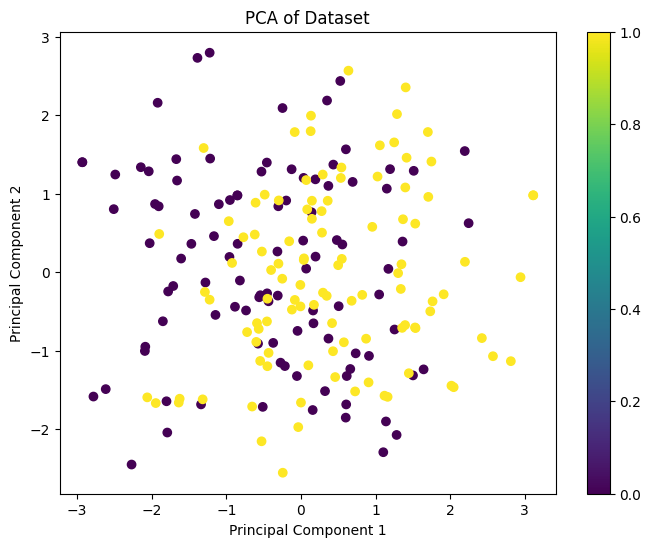

In [43]:
from sklearn.decomposition import PCA

# Initialize PCA, specifying the number of components
pca = PCA(n_components=2)  # You can start with 2 for visualization

# Fit and transform the data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

target_variable = dataset['Decision']

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=target_variable, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

Accuracy: 0.4390

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.29      0.34        21
           1       0.44      0.60      0.51        20

    accuracy                           0.44        41
   macro avg       0.44      0.44      0.43        41
weighted avg       0.44      0.44      0.42        41



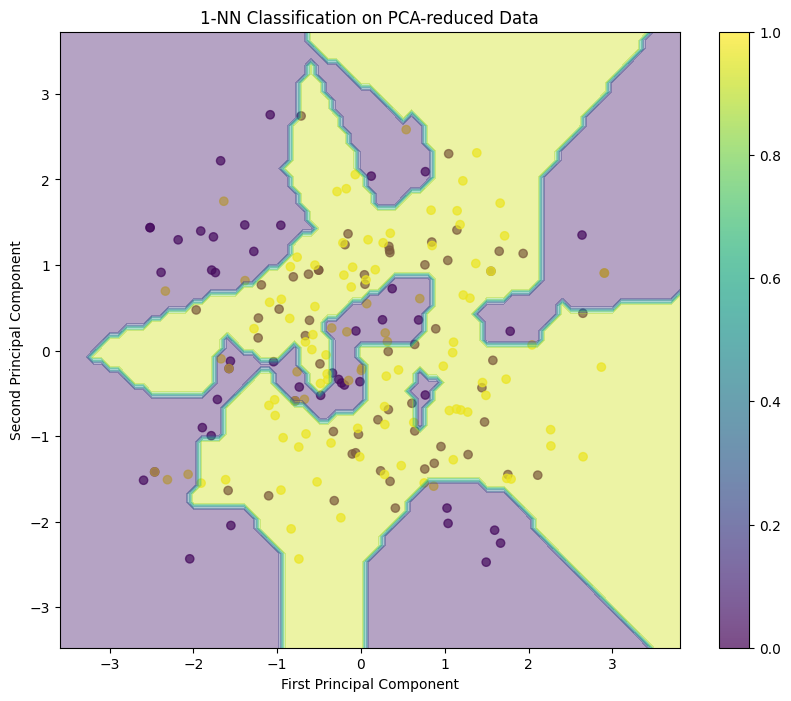

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=3)  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Create and train the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)

# 6. Make predictions
y_pred = nn_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Visualize the results (for 2D PCA)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('1-NN Classification on PCA-reduced Data')
plt.colorbar(scatter)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = nn_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.show()

5-Fold Cross-Validation Scores: [0.63636364 0.6        0.3        0.7        0.6       ]
Mean CV Score: 0.5673
Standard Deviation of CV Scores: 0.1385

Validation Accuracy: 0.4902

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        24
           1       0.52      0.56      0.54        27

    accuracy                           0.49        51
   macro avg       0.49      0.49      0.49        51
weighted avg       0.49      0.49      0.49        51


Test Accuracy: 0.4854

Test Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.48        52
           1       0.48      0.51      0.50        51

    accuracy                           0.49       103
   macro avg       0.49      0.49      0.49       103
weighted avg       0.49      0.49      0.49       103



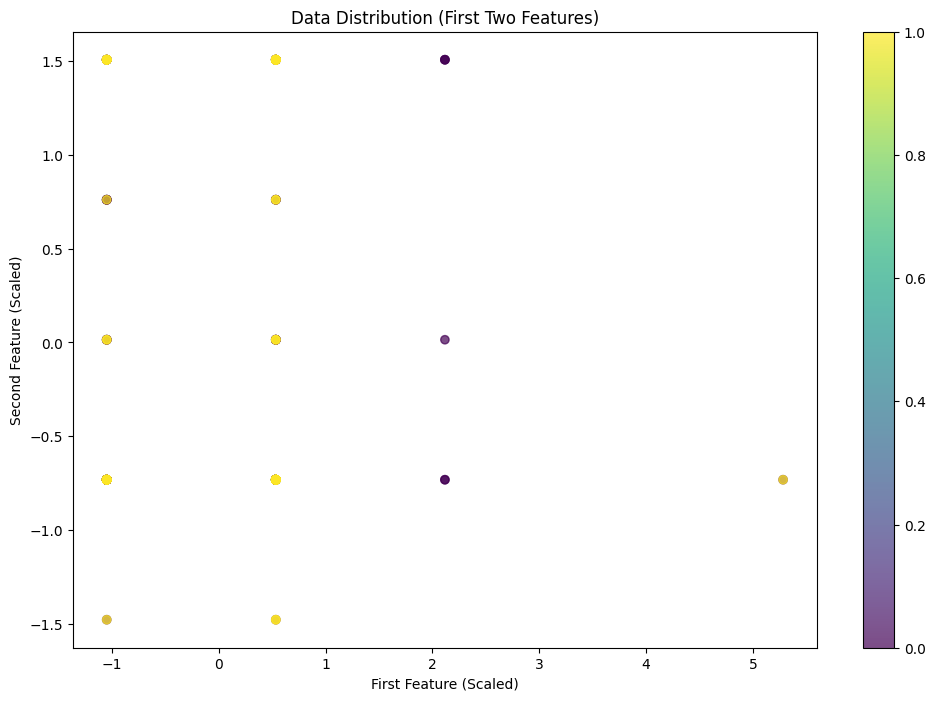

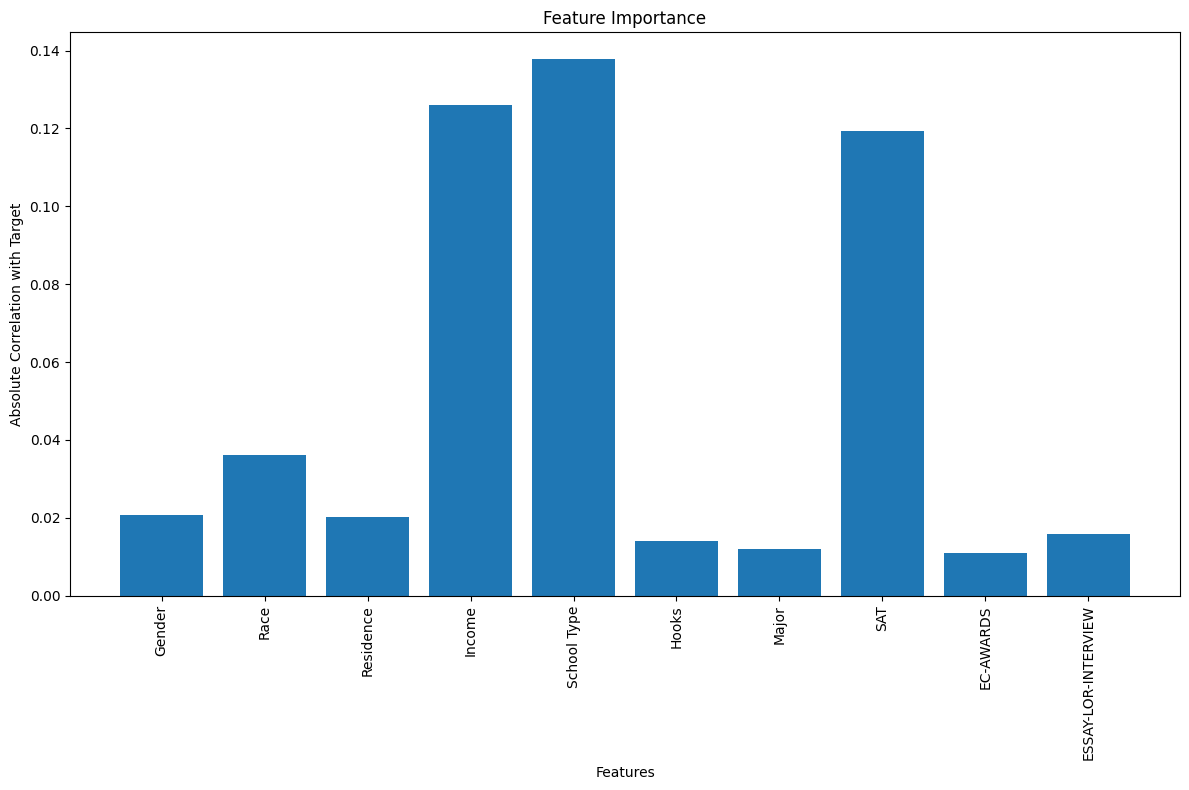

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into train+validation and test sets (50% each)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# 4. Further split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# 5. Create the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)

# 6. Perform k-fold cross-validation on the training set
k_folds = 5
cv_scores = cross_val_score(nn_classifier, X_train, y_train, cv=k_folds)

print(f"{k_folds}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# 7. Train the model on the entire training set
nn_classifier.fit(X_train, y_train)

# 8. Evaluate on the validation set
y_val_pred = nn_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# 9. Final evaluation on the test set
y_test_pred = nn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# 10. Visualize the results (for the first two features)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Feature (Scaled)')
plt.ylabel('Second Feature (Scaled)')
plt.title('Data Distribution (First Two Features)')
plt.colorbar(scatter)
plt.show()

# 11. Feature Importance (using correlation with target)
feature_importance = abs(np.corrcoef(X_scaled.T, y)[:-1, -1])
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Target')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()